# Hip-Hop/ Rap Lyrics

In [1]:
# Imports
import requests
import os
import json
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# Load .env environment variables
load_dotenv()

# Set RAPID API key
my_rapid_api_key = os.getenv("RAPID_API_KEY")

In [3]:
# Define function to use Shazam Core API

def get_chart_genre(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/charts/genre-world"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [4]:
# Define function to use Shazam Core API

def get_lyrics(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/tracks/details"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [5]:
# Use 'Track details' endpoint to retrieve lyrics for a single track

genre = 'HIP_HOP_RAP'
limit_songs = 50
country = 'US'

querystring = {"country_code":country,"genre_code":genre,"limit":limit_songs}
chart_response = get_chart_genre(querystring)

In [6]:
# Retrieve Track IDs

track_ids=[] # song identifier
titles = [] # song name
subtitles = [] # Main artist and featured artists

for track in range(len(chart_response)):
    track_ids.append(chart_response[track]['id'])
    titles.append(chart_response[track]['title'])
    subtitles.append(chart_response[track]['subtitle'])

print(f"The number of songs retrieved is : {len(track_ids)}")

chart_songs = pd.DataFrame({"Track Name": titles, "Artists": subtitles, 'TrackIDs': track_ids}).set_index('TrackIDs')
chart_songs.head(5)

The number of songs retrieved is : 50


,Track Name,Artists
TrackIDs,,
41264695,Bananza (Belly Dancer),Akon
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow
577235374,edamame,bbno$ Feat. Rich Brian
578737070,Praise God,Kanye West


<AxesSubplot:title={'center':'Hip-Hop/Rap Artists on Top Chart'}, xlabel='Artists'>

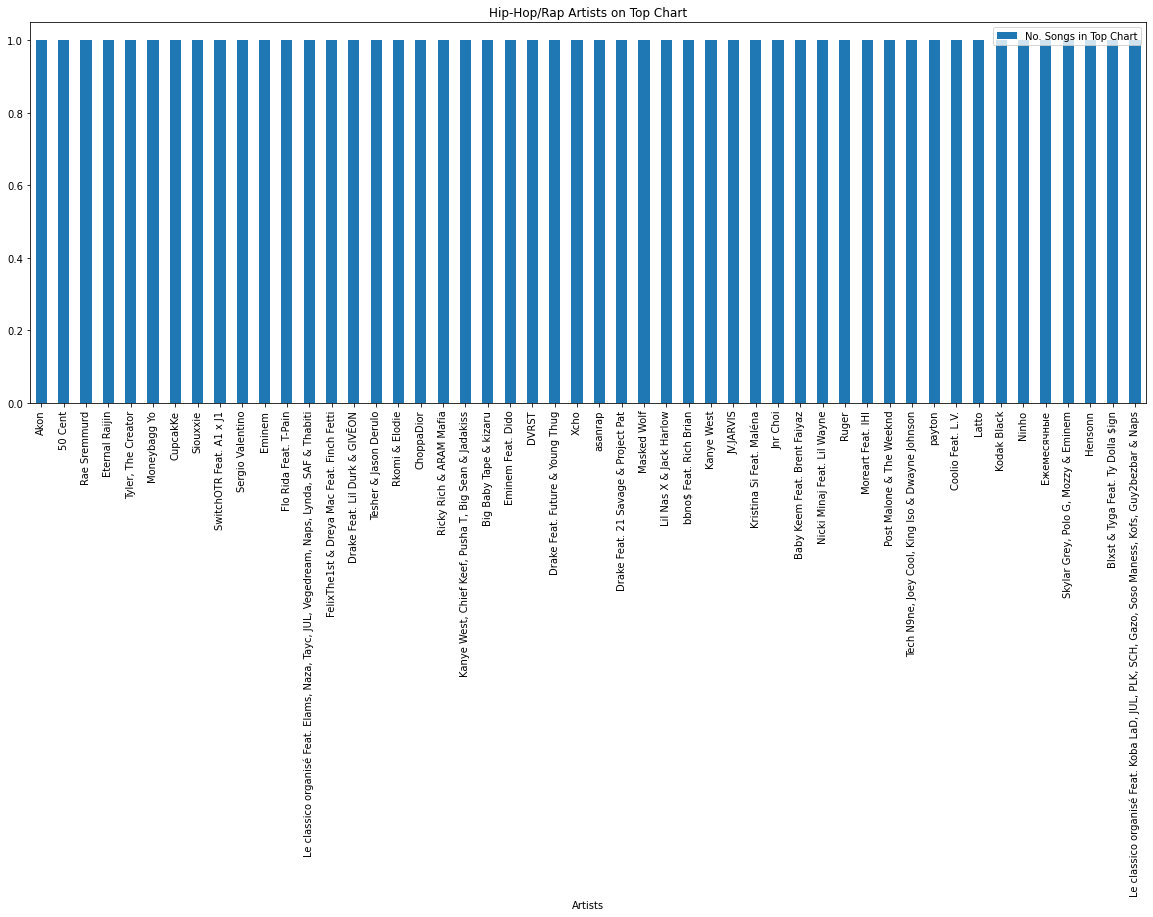

In [7]:
# Look at the data

from collections import Counter

artists_list = list(chart_songs.Artists)
artist_counts = {artist: artists_list.count(artist) for artist in artists_list} #dict with frequency of artist in top chart

artists_df = pd.DataFrame(list(artist_counts.items()),columns = ['Artists','No. Songs in Top Chart']).set_index('Artists')
artists_df.sort_values(by = 'No. Songs in Top Chart', ascending=False, inplace=True) #sort values

artists_df.plot.bar(figsize =(20, 7), title = 'Hip-Hop/Rap Artists on Top Chart')

In [8]:
# Retrieve Lyrics for all TrackIDs

track_ids  # the list created in "Search for top songs in Genre" section is required

lyrics=[]

for trackID in track_ids:
    querystring = {"track_id":trackID}
    track_details_response = get_lyrics(querystring)

    if track_details_response['sections'][1]['type'] != "LYRICS":  # Note: tracks with a type != "LYRICS" don't contain lyrics
        lyrics.append([''])
    else:
        track_lyrics = track_details_response['sections'][1]['text']
        lyrics.append(track_lyrics)

In [9]:
# Add lyrics column to dataframe with chart songs

all_lyrics = pd.Series(" ".join(map(str,song)) for song in lyrics) #each song is stored as a list, this turns each list into a string
all_lyrics_df = pd.DataFrame({"Lyrics": all_lyrics, "Track IDs": track_ids}).set_index('Track IDs')

lyrics_df = pd.concat([chart_songs, all_lyrics_df], axis=1)
lyrics_df.head(5)

,Track Name,Artists,Lyrics
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...
578737070,Praise God,Kanye West,"That she wrote, Speech to the Young: Speech to..."


In [10]:
lyrics_df

,Track Name,Artists,Lyrics
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...
578737070,Praise God,Kanye West,"That she wrote, Speech to the Young: Speech to..."
565785367,น้ำแดงน้ำส้ม,JV.JARVIS,คัมซามิดา สวัสดีค้าบ ในกระเป๋าไม่มียา ชอบไปรัช...
594606167,Chem Haskanum,Kristina Si Feat. Maléna,Ահ չեմ հասկանում ինչ ա կատարվում իմ գլխում Չեմ...
590362040,TO THE MOON,Jnr Choi,
585881868,lost souls,Baby Keem Feat. Brent Faiyaz,"It's a lot of hoes in here, lot of lost souls ..."
74992451,High School,Nicki Minaj Feat. Lil Wayne,He said he came from Jamaica He owned a couple...


In [11]:
lyrics_df.describe()

,Track Name,Artists,Lyrics
count,50,50,50
unique,50,50,39
top,Bananza (Belly Dancer),Akon,
freq,1,1,12


In [12]:
#Remove empty lyrics
new_lyrics_df = lyrics_df.drop(
    [
        '565785367', 
        '594606167', 
        '590362040', 
        '545851877', 
        '587443428', 
        '594732573', 
        '370801349', 
        '586574460', 
        '594563183', 
        '583860081', 
        '590716230', 
        '587879823', 
        '596254244', 
        '594233500', 
        '570961310', 
        '583860065', 
        '595153306', 
        '467915649', 
        '535449750', 
        '594403685', 
        '594403685', 
        '570973895'
    ]
)
new_lyrics_df

,Track Name,Artists,Lyrics
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...
578737070,Praise God,Kanye West,"That she wrote, Speech to the Young: Speech to..."
585881868,lost souls,Baby Keem Feat. Brent Faiyaz,"It's a lot of hoes in here, lot of lost souls ..."
74992451,High School,Nicki Minaj Feat. Lil Wayne,He said he came from Jamaica He owned a couple...
591239041,Dior,Ruger,"Hmm, ohh-yeah-oh Bad man lookin' good in Dior..."
590487170,One Right Now,Post Malone & The Weeknd,"Na-na-na-na, na-na Na-na-na-na, oh no Yeah, ye..."
585735678,Face Off,"Tech N9ne, Joey Cool, King Iso & Dwayne Johnson","Rumble, they gon' take your face off Spirit o..."


In [13]:
new_lyrics_df.describe()

,Track Name,Artists,Lyrics
count,29,29,29
unique,29,29,29
top,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ..."
freq,1,1,1


# Tokenizer
In this section, I will use NLTK and Python to tokenize the text. This will include:

- Lowercase each word
- Remove Punctuation
- Remove Stopwords

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [21]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [121]:
def tokenizer(Lyrics):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(Lyrics)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_add_ons = ['', 'ai', 'nt', 'wan', 'na', 'uh', 'ay', 'ta', 'nigga', 'shit', 'fuck', 'bitch', 'fucked', 'pussy', 'hoe', 'motherfucker', 'bitches']
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens

In [122]:
# Create a new tokens column for lyrics
lyrics_tokens = [tokenizer(words) for words in new_lyrics_df['Lyrics']]
new_lyrics_df['Tokens'] = lyrics_tokens
new_lyrics_df.head()

,Track Name,Artists,Lyrics,Tokens
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ...","[hey, lady, drop, want, see, touch, ground, sh..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...,"[little, nigga, really, lockdown, still, doin,..."
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a...","[dddaytrip, took, ten, hey, baby, back, ayy, c..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...,"[ball, hanging, low, pop, bottle, yacht, chain..."
578737070,Praise God,Kanye West,"That she wrote, Speech to the Young: Speech to...","[wrote, speech, young, speech, progress, towar..."


In [123]:
new_lyrics_df[['Lyrics', 'Tokens']]

,Lyrics,Tokens
41264695,"Hey, ladies drop it down Just want to see you ...","[hey, lady, drop, want, see, touch, ground, sh..."
579792092,Little niggas really wan' at me (At me) Lockdo...,"[little, nigga, really, lockdown, still, doin,..."
578340247,"D-D-Daytrip took it to ten (hey) Baby back, a...","[dddaytrip, took, ten, hey, baby, back, ayy, c..."
577235374,Balls hanging low while I pop a bottle off a y...,"[ball, hanging, low, pop, bottle, yacht, chain..."
578737070,"That she wrote, Speech to the Young: Speech to...","[wrote, speech, young, speech, progress, towar..."
585881868,"It's a lot of hoes in here, lot of lost souls ...","[lot, hoe, lot, lost, soul, whole, group, dime..."
74992451,He said he came from Jamaica He owned a couple...,"[said, came, jamaica, owned, couple, acre, cou..."
591239041,"Hmm, ohh-yeah-oh Bad man lookin' good in Dior...","[hmm, ohhyeahoh, bad, man, lookin, good, dior,..."
590487170,"Na-na-na-na, na-na Na-na-na-na, oh no Yeah, ye...","[nananana, nana, nananana, oh, yeah, yeah, sai..."
585735678,"Rumble, they gon' take your face off Spirit o...","[rumble, gon, take, face, spirit, lion, descri..."


# NGrams and Frequency Analysis
In this section there are the ngrams and word frequency for lyrics.

Use NLTK to produce the n-grams for N = 2.

In [124]:
from collections import Counter
from nltk import ngrams

In [125]:
# Generate the Bitcoin N-grams where N=2
lyrics_text = ' '.join(new_lyrics_df["Lyrics"])
lyrics_processed = tokenizer(lyrics_text)
lyrics_ngrams = Counter(ngrams(lyrics_processed, n=2))
print(dict(lyrics_ngrams.most_common(10)))

{('low', 'low'): 56, ('girl', 'go'): 28, ('money', 'make'): 28, ('yeah', 'yeah'): 27, ('one', 'right'): 21, ('masquerade', 'masquerade'): 21, ('doin', 'dope'): 21, ('bad', 'man'): 18, ('let', 'get'): 17, ('big', 'energy'): 17}


In [126]:
# Use the token_count function to generate the top 10 words from the lyrics
def token_count(Tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [127]:
# Use token_count to get the top 10 words from hip hop rap lyrics
lyrics_top_10 = token_count(lyrics_processed)
lyrics_top_10

[('like', 242),
 ('got', 124),
 ('yeah', 124),
 ('want', 99),
 ('go', 88),
 ('get', 84),
 ('one', 80),
 ('low', 77),
 ('know', 73),
 ('girl', 66)]

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Hip-Hop/Rap Lyrics')

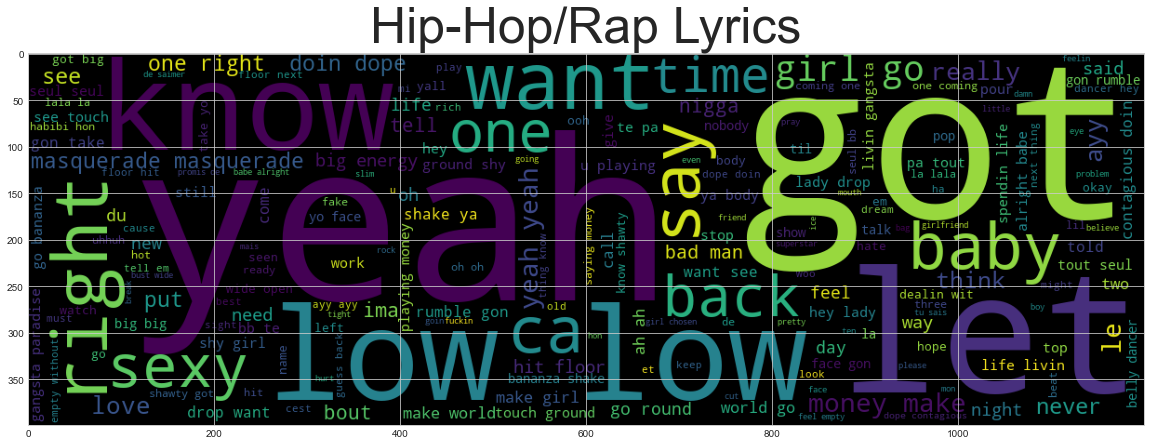

In [129]:
# Generate the Bitcoin word cloud
lyrics_words_joined = ' '.join(lyrics_processed)
wc = WordCloud(width=1200, height=400).generate(lyrics_words_joined)
plt.imshow(wc)
plt.title('Hip-Hop/Rap Lyrics', fontdict={'fontsize':50}, loc='Center')